<a href="https://colab.research.google.com/github/jadmatar1/6220/blob/main/newdatasetJAD_MATAR_6220_PYCARET_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [1]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

     |████████████████████████████████| 301 kB 26.2 MB/s 
     |████████████████████████████████| 1.7 MB 59.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.0 MB/s 
     |████████████████████████████████| 2.0 MB 49.2 MB/s 
     |████████████████████████████████| 1.3 MB 46.5 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 6.8 MB 45.2 MB/s 
     |████████████████████████████████| 16.8 MB 49.4 MB/s 
     |████████████████████████████████| 167 kB 57.1 MB/s 
     |████████████████████████████████| 261 kB 55.6 MB/s 
     |████████████████████████████████| 116 kB 62.0 MB/s 
     |████████████████████████████████| 303 kB 49.3 MB/s 
     |████████████████████████████████| 636 kB 52.4 MB/s 
     |████████████████████████████████| 102 kB 8.9 MB/s 
     |█████████████████

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [5]:
#read cvs file into dataframe

df1 = pd.read_csv('https://raw.githubusercontent.com/jadmatar1/6220/main/auto-mpg.csv')
df1.head(25)

mpg  cylinders  displacement horsepower  weight  acceleration  \
0   18.0          8         307.0        130    3504          12.0   
1   15.0          8         350.0        165    3693          11.5   
2   18.0          8         318.0        150    3436          11.0   
3   16.0          8         304.0        150    3433          12.0   
4   17.0          8         302.0        140    3449          10.5   
5   15.0          8         429.0        198    4341          10.0   
6   14.0          8         454.0        220    4354           9.0   
7   14.0          8         440.0        215    4312           8.5   
8   14.0          8         455.0        225    4425          10.0   
9   15.0          8         390.0        190    3850           8.5   
10  15.0          8         383.0        170    3563          10.0   
11  14.0          8         340.0        160    3609           8.0   
12  15.0          8         400.0        150    3761           9.5   
13  14.0          8         455.0        225    3086          10.0   
14  24.0          4         113.0         95    2372          15.0   
15  22.0          6         198.0         95    2833          15.5   
16  18.0          6         199.0         97    2774          15.5   
17  21.0          6         200.0         85    2587          16.0   
18  27.0          4          97.0         88    2130          14.5   
19  26.0          4          97.0         46    1835          20.5   
20  25.0          4         110.0         87    2672          17.5   
21  24.0          4         107.0         90    2430          14.5   
22  25.0          4         104.0         95    2375          17.5   
23  26.0          4         121.0        113    2234          12.5   
24  21.0          6         199.0         90    2648          15.0   

    model year  origin                      car name  
0           70       1     chevrolet chevelle malibu  
1           70       1             buick skylark 320  
2           70       1            plymouth satellite  
3           70       1                 amc rebel sst  
4           70       1                   ford torino  
5           70       1              ford galaxie 500  
6           70       1              chevrolet impala  
7           70       1             plymouth fury iii  
8           70       1              pontiac catalina  
9           70       1            amc ambassador dpl  
10          70       1           dodge challenger se  
11          70       1            plymouth 'cuda 340  
12          70       1         chevrolet monte carlo  
13          70       1       buick estate wagon (sw)  
14          70       3         toyota corona mark ii  
15          70       1               plymouth duster  
16          70       1                    amc hornet  
17          70       1                 ford maverick  
18          70       3                  datsun pl510  
19          70       2  volkswagen 1131 deluxe sedan  
20          70       2                   peugeot 504  
21          70       2                   audi 100 ls  
22          70       2                      saab 99e  
23          70       2                      bmw 2002  
24          70       1                   amc gremlin

In [6]:
df = df1.drop(['car name', 'model year'], axis =1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  1


In [9]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [10]:
df.duplicated(subset=['mpg'	,'cylinders',	'displacement',	'horsepower',	'acceleration',	'origin']).sum()

3

In [11]:
df.loc[df.duplicated(), :]

mpg  cylinders  displacement horsepower  weight  acceleration  origin
29  27.0          4          97.0         88    2130          14.5       3

In [13]:
df.drop_duplicates(subset=['mpg'	,'cylinders',	'displacement',	'horsepower',	'acceleration',	'origin'], keep = False, inplace = True)

In [15]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [14]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [22]:
df = df[df.horsepower != '?']

In [34]:
df = df.drop(386)

**Exploratory Data Analysis**

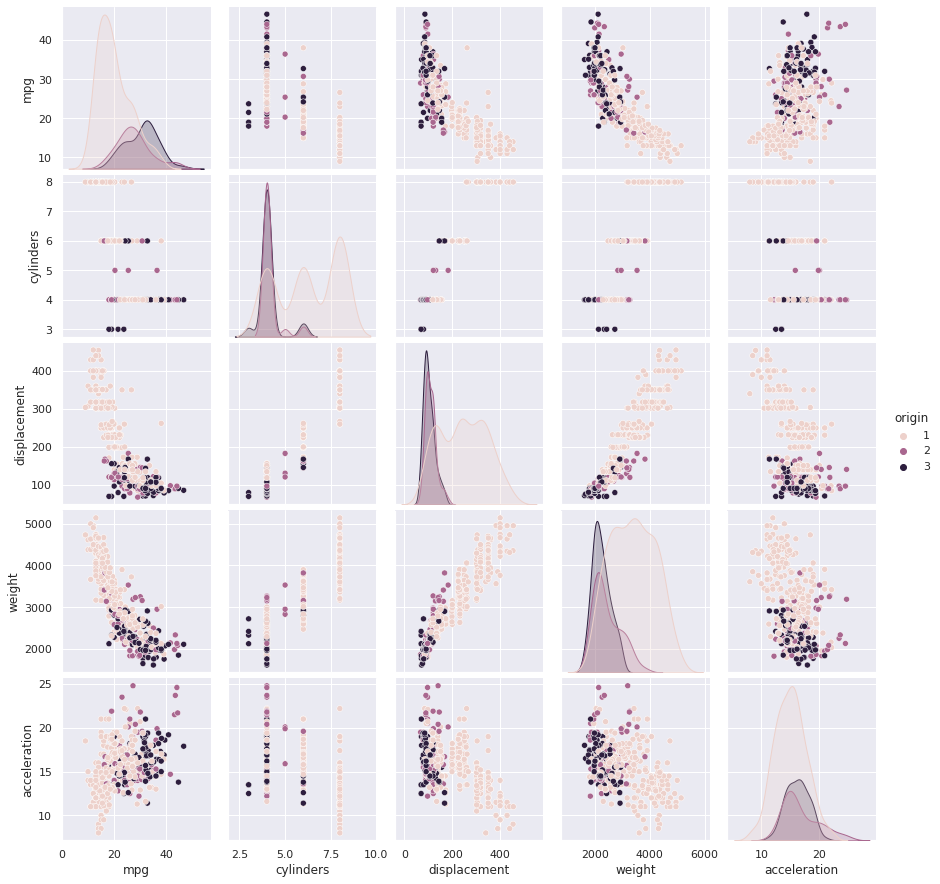

In [35]:
sns.pairplot(df, hue='origin')
plt.show()

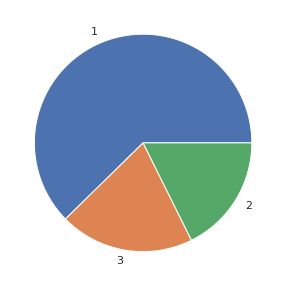

In [36]:
y =df['origin']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [37]:
X = df.drop(columns=['origin'])
X.head(10)

mpg  cylinders  displacement horsepower  weight  acceleration
0   18.0          8         307.0        130    3504          12.0
1   15.0          8         350.0        165    3693          11.5
2   18.0          8         318.0        150    3436          11.0
3   16.0          8         304.0        150    3433          12.0
4   17.0          8         302.0        140    3449          10.5
5   15.0          8         429.0        198    4341          10.0
6   14.0          8         454.0        220    4354           9.0
7   14.0          8         440.0        215    4312           8.5
9   15.0          8         390.0        190    3850           8.5
10  15.0          8         383.0        170    3563          10.0

In [38]:
X.describe().transpose()

count         mean         std     min     25%     50%     75%  \
mpg           385.0    23.500779    7.831625     9.0    17.0    23.0    29.0   
cylinders     385.0     5.462338    1.707599     3.0     4.0     4.0     8.0   
displacement  385.0   193.440260  103.636844    68.0   105.0   146.0   267.0   
weight        385.0  2976.007792  851.057273  1613.0  2226.0  2795.0  3620.0   
acceleration  385.0    15.568312    2.752647     8.0    13.8    15.5    17.2   

                 max  
mpg             46.6  
cylinders        8.0  
displacement   455.0  
weight        5140.0  
acceleration    24.8

**Standardize the Data**

In [39]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

mpg  cylinders  displacement  horsepower    weight  acceleration
0 -0.703294   1.488033      1.097173    0.690518  0.621203     -1.298007
1 -1.086855   1.488033      1.512623    1.616914  0.843569     -1.479887
2 -0.703294   1.488033      1.203451    1.219887  0.541198     -1.661766
3 -0.959001   1.488033      1.068188    1.219887  0.537669     -1.298007
4 -0.831148   1.488033      1.048864    0.955202  0.556493     -1.843646
5 -1.086855   1.488033      2.275892    2.490373  1.605965     -2.025526
6 -1.214709   1.488033      2.517433    3.072679  1.621260     -2.389285
7 -1.214709   1.488033      2.382170    2.940337  1.571846     -2.571165
8 -1.086855   1.488033      1.899088    2.278625  1.028285     -2.571165
9 -1.086855   1.488033      1.831457    1.749256  0.690619     -2.025526

In [40]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
mpg           385.0  2.229097e-16  1.001301 -1.853976 -0.831148 -0.064026   
cylinders     385.0  8.166628e-16  1.001301 -1.443864 -0.857485 -0.857485   
displacement  385.0 -9.487360e-17  1.001301 -1.211958 -0.854477 -0.458350   
horsepower    385.0 -1.167897e-16  1.001301 -1.532833 -0.765248 -0.315284   
weight        385.0  8.261790e-17  1.001301 -1.603630 -0.882413 -0.212963   
acceleration  385.0  1.359951e-15  1.001301 -2.753044 -0.643240 -0.024849   

                   75%       max  
mpg           0.703095  2.953318  
cylinders     1.488033  1.488033  
displacement  0.710707  2.527094  
horsepower    0.558175  3.337364  
weight        0.757681  2.546019  
acceleration  0.593542  3.358113

**Observations and variables**

In [41]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

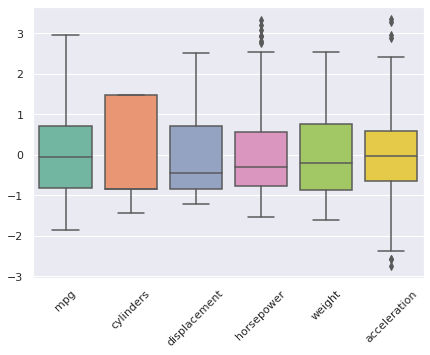

In [42]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

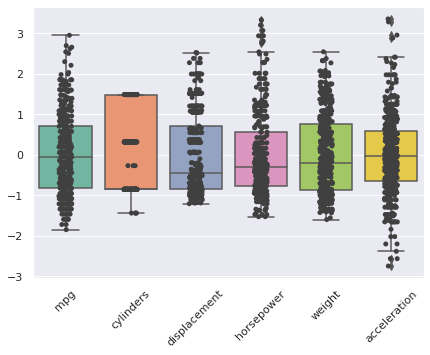

In [43]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


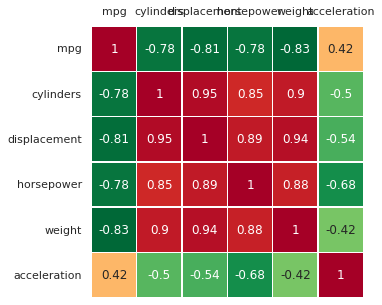

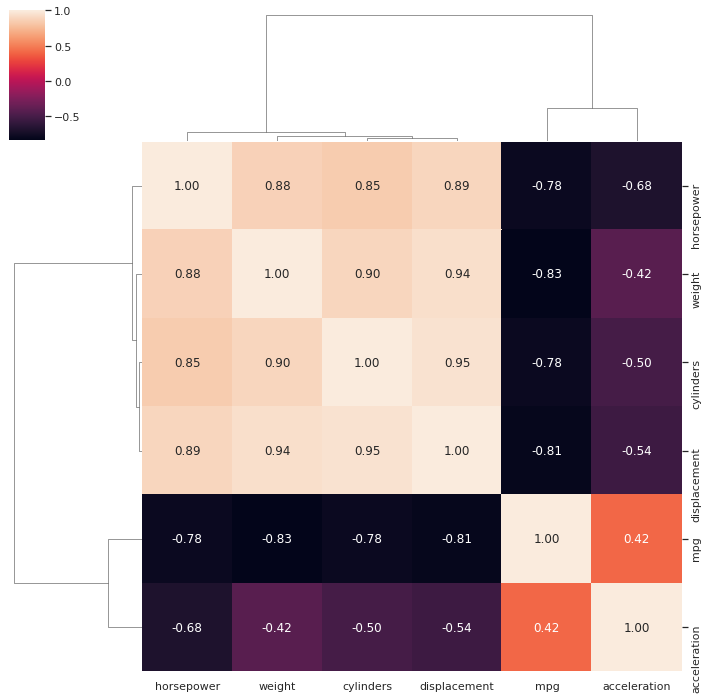

In [44]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

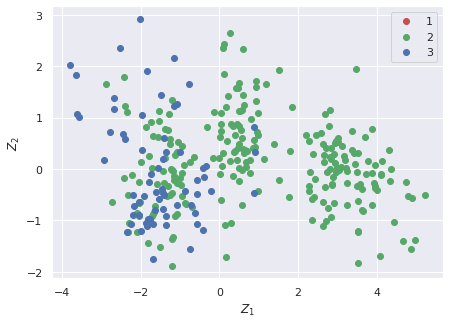

In [46]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='1')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='2')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='3')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

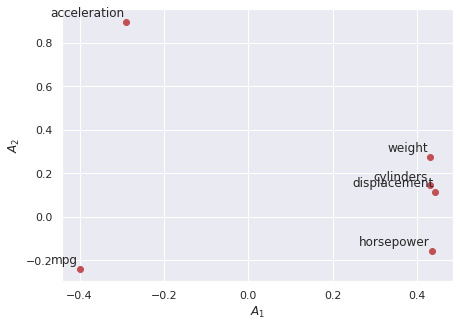

In [47]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


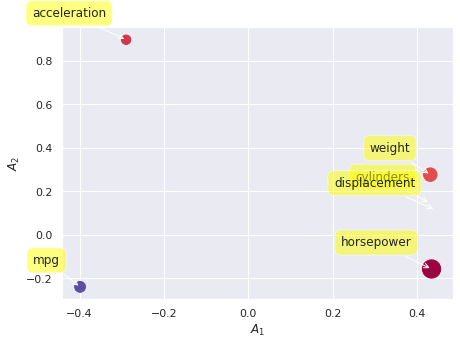

In [48]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

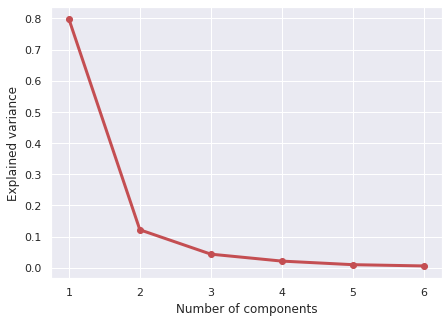

In [49]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

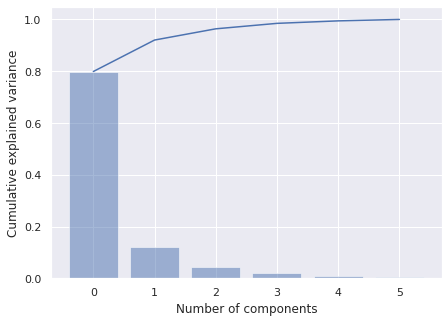

In [50]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

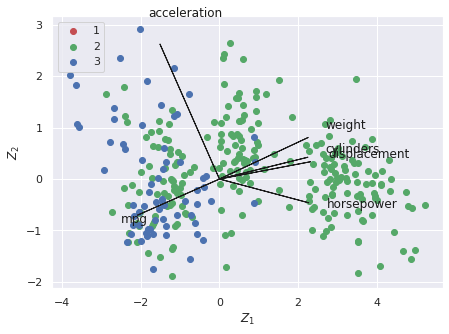

In [52]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='1')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='2')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='3')
plt.legend(loc='upper left')

##**Using PCA Library**

In [53]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=1ca4075315a2755a12f207e117f50cc6beab9ceb8f450366dc5a06ba3b57e2cc
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [54]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [55]:
out['PC']

PC1       PC2       PC3
0    2.351488 -0.591743  0.301629
1    3.239988 -0.700012  0.121113
2    2.699502 -1.011985  0.297385
3    2.634672 -0.640390  0.071099
4    2.626172 -1.116298  0.125424
..        ...       ...       ...
380 -1.080275 -0.266625 -0.151898
381 -3.805601  2.030542  1.755432
382 -1.209793 -1.885203  0.176798
383 -1.697246  0.635999 -0.030785
384 -1.855970  0.822362  0.333084

[385 rows x 3 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd880ab2450>)

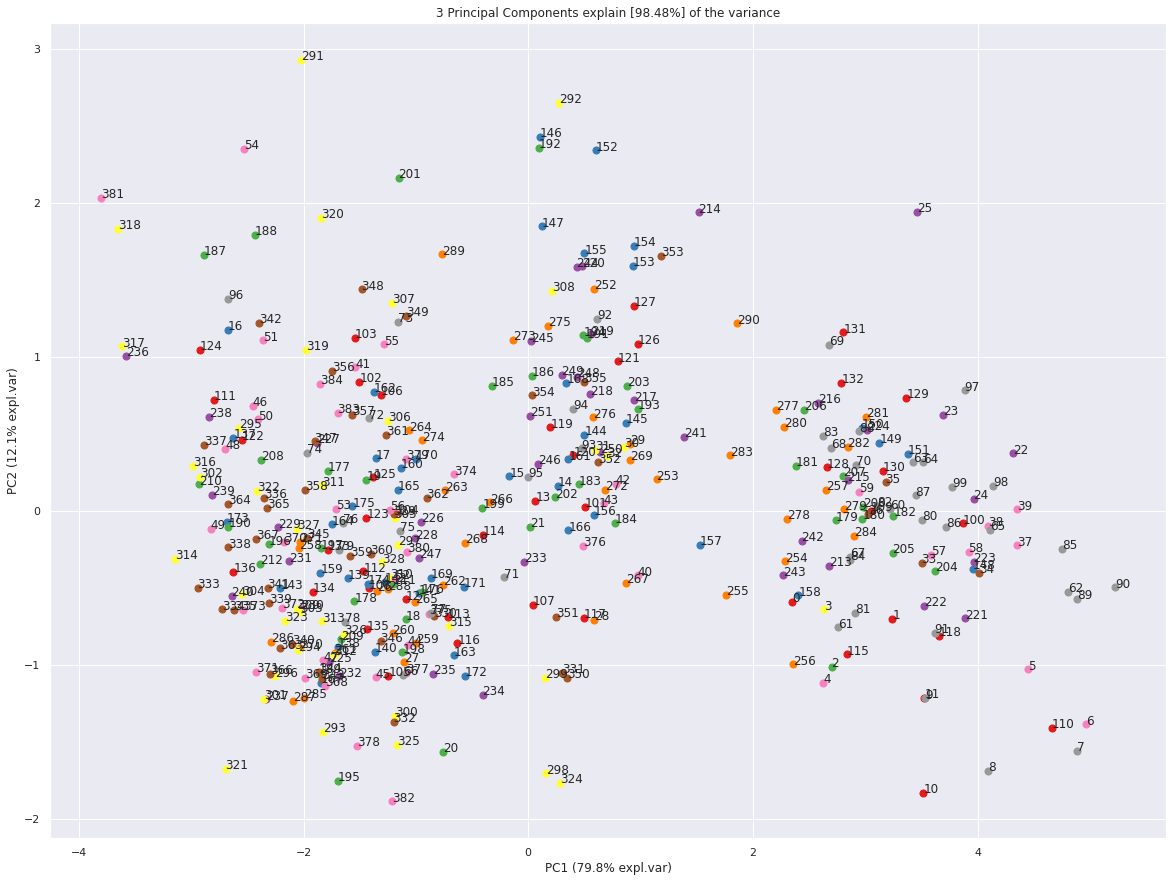

In [56]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [57]:
A = out['loadings'].T

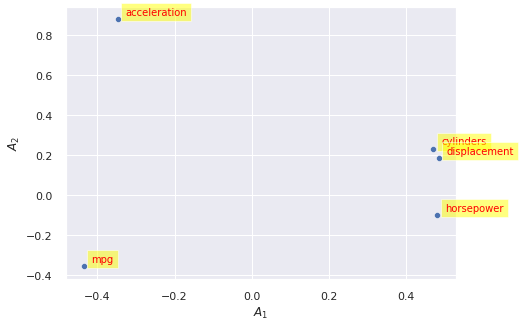

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**PC Values**

In [58]:
print(A)

                   PC1       PC2       PC3
mpg          -0.398791 -0.240409  0.850899
cylinders     0.430418  0.145112  0.405005
displacement  0.443250  0.115083  0.297819
horsepower    0.434716 -0.158087  0.011408
weight        0.431766  0.276530  0.123970
acceleration -0.289543  0.898021  0.088016


**Scree Plot**

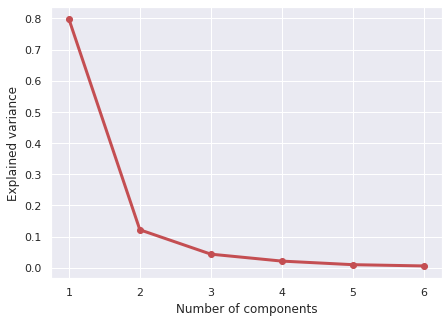

In [59]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

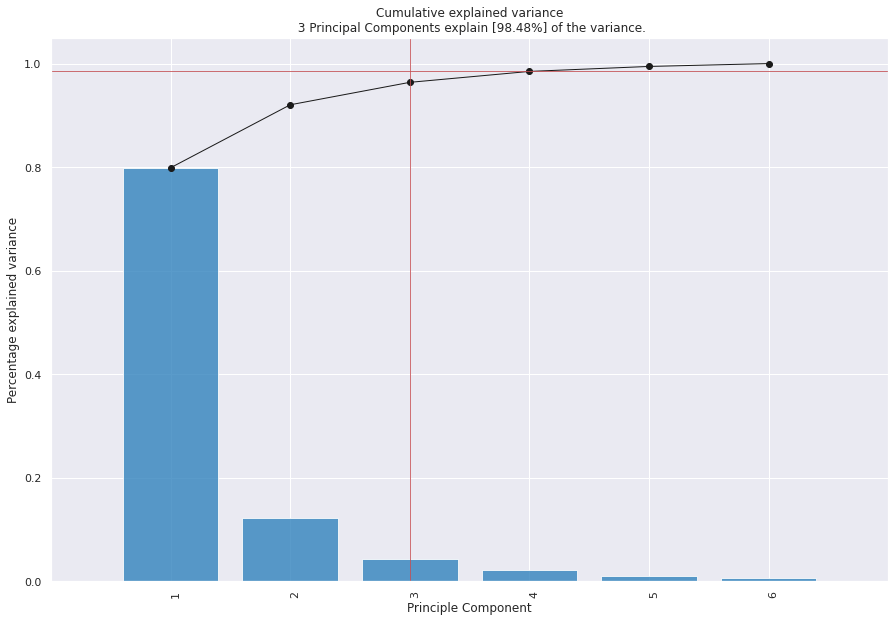

<Figure size 504x360 with 0 Axes>

In [60]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


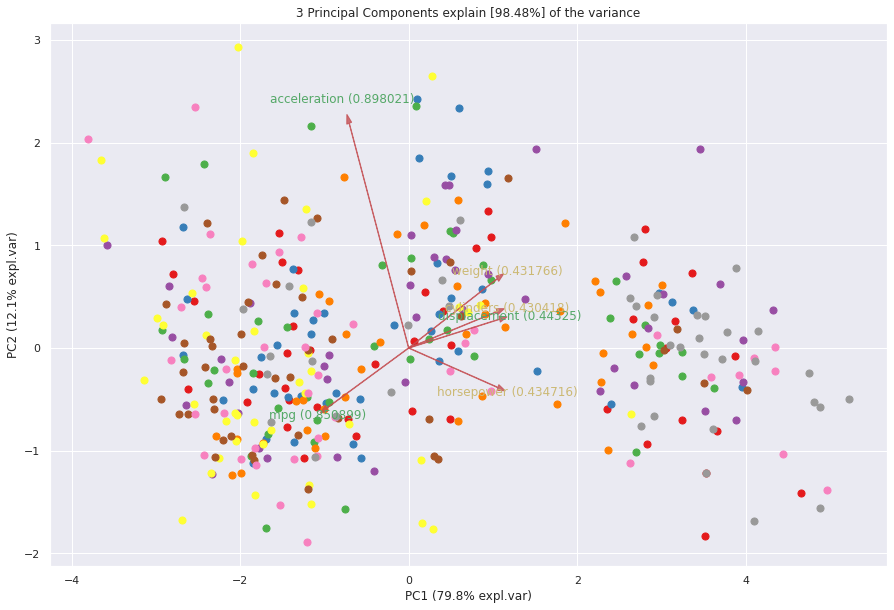

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd87fe07250>)

In [61]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


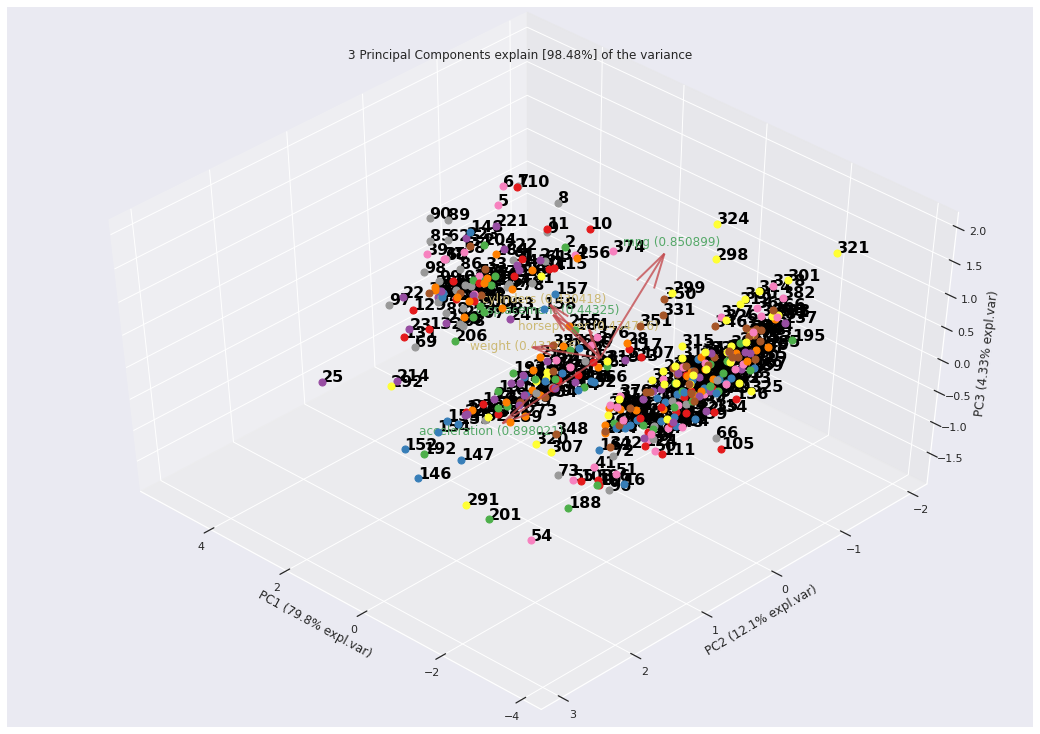

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fd87f8105d0>)

In [62]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [63]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [64]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (346, 7)
Unseen Data For Predictions: (39, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [67]:
from pycaret.classification import *
#clf =
setup(data=data, target='origin', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target            origin
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (346, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (242, 10)
12                    Transformed Test Set         (104, 10)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              30ad
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

(10,
 {'ada': <pycaret.containers.models.classification.AdaBoostClassifierContainer at 0x7fd7eaf5d810>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x7fd7eb01be50>,
  'dummy': <pycaret.containers.models.classification.DummyClassifierContainer at 0x7fd7eaf12210>,
  'et': <pycaret.containers.models.classification.ExtraTreesClassifierContainer at 0x7fd7eaf12310>,
  'gbc': <pycaret.containers.models.classification.GradientBoostingClassifierContainer at 0x7fd7eaf07ed0>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x7fd7eb022590>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x7fd7eb01bf90>,
  'lda': <pycaret.containers.models.classification.LinearDiscriminantAnalysisContainer at 0x7fd7eb022f50>,
  'lightgbm': <pycaret.containers.models.classification.LGBMClassifierContainer at 0x7fd7eaf126d0>,
  'lr': <pycaret.containers.models.classification.LogisticRegressionClassif

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [68]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.8268  0.9534  0.7432  0.8480   
gbc          Gradient Boosting Classifier    0.8222  0.9420  0.7135  0.8402   
rf               Random Forest Classifier    0.8180  0.9482  0.7204  0.8436   
lightgbm  Light Gradient Boosting Machine    0.7933  0.9369  0.6800  0.8048   
dt               Decision Tree Classifier    0.7692  0.8003  0.6537  0.7831   
lr                    Logistic Regression    0.7522  0.9318  0.6125  0.7630   
ridge                    Ridge Classifier    0.7445  0.0000  0.5714  0.7259   
lda          Linear Discriminant Analysis    0.7402  0.9158  0.6324  0.7602   
ada                  Ada Boost Classifier    0.7393  0.8346  0.6443  0.7682   
qda       Quadratic Discriminant Analysis    0.6530  0.0000  0.3333  0.4267   
dummy                    Dummy Classifier    0.6530  0.5000  0.3333  0.4267   
svm                   SVM - Linear Kernel    0.6452  0.0000  0.5104  0.6333   
knn                K Neighbors Classifier    0.6445  0.7746  0.4293  0.5839   
nb                            Naive Bayes    0.6398  0.8559  0.6083  0.7479   

              F1   Kappa     MCC  TT (Sec)  
et        0.8230  0.6542  0.6677     0.411  
gbc       0.8121  0.6370  0.6520     0.210  
rf        0.8070  0.6292  0.6492     0.450  
lightgbm  0.7835  0.5784  0.5966     0.078  
dt        0.7663  0.5530  0.5632     0.011  
lr        0.7441  0.5064  0.5174     0.442  
ridge     0.7126  0.4354  0.4635     0.012  
lda       0.7326  0.4875  0.5028     0.012  
ada       0.7379  0.4943  0.5084     0.077  
qda       0.5161  0.0000  0.0000     0.012  
dummy     0.5161  0.0000  0.0000     0.010  
svm       0.5978  0.3075  0.3657     0.060  
knn       0.5987  0.1903  0.2089     0.110  
nb        0.6634  0.4045  0.4322     0.011

In [69]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [70]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.7845  0.6167  0.7689  0.7718  0.5734  0.5939
1       0.6000  0.6948  0.5125  0.6682  0.6266  0.3113  0.3184
2       0.7917  0.7986  0.6236  0.7757  0.7811  0.5604  0.5632
3       0.6667  0.7625  0.5833  0.7334  0.6827  0.4074  0.4256
4       0.8333  0.8625  0.7292  0.8361  0.8313  0.6667  0.6690
5       0.8750  0.9250  0.8750  0.9286  0.8863  0.7692  0.7881
6       0.8333  0.8625  0.7292  0.8361  0.8313  0.6667  0.6690
7       0.7917  0.8000  0.6458  0.7688  0.7787  0.5652  0.5679
8       0.7083  0.7294  0.5889  0.7023  0.7028  0.4381  0.4400
9       0.7917  0.7833  0.6333  0.8125  0.7706  0.5714  0.5966
Mean    0.7692  0.8003  0.6537  0.7831  0.7663  0.5530  0.5632
SD      0.0805  0.0643  0.0960  0.0709  0.0734  0.1290  0.1300

In [71]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [72]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.8441  0.6167  0.7689  0.7718  0.5734  0.5939
1       0.8000  0.9062  0.7708  0.8171  0.8013  0.6429  0.6512
2       0.6667  0.7284  0.4694  0.6778  0.6667  0.3379  0.3427
3       0.8750  0.9062  0.8125  0.8882  0.8653  0.7391  0.7484
4       0.7917  0.9208  0.7083  0.7944  0.7897  0.5833  0.5854
5       0.6667  0.8427  0.5208  0.6861  0.6749  0.3600  0.3614
6       0.8750  0.9229  0.7500  0.8778  0.8730  0.7500  0.7526
7       0.6667  0.8854  0.5833  0.7103  0.6833  0.3846  0.3904
8       0.8750  0.9653  0.7833  0.8958  0.8673  0.7419  0.7686
9       0.7917  0.9555  0.6000  0.6597  0.7197  0.5652  0.6029
Mean    0.7808  0.8878  0.6615  0.7776  0.7713  0.5678  0.5797
SD      0.0817  0.0655  0.1132  0.0866  0.0776  0.1511  0.1548

In [73]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [74]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 25.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


How to analyze model performance using various plots

In [75]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [76]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7200  0.8936  0.4667  0.6210  0.6535  0.3519  0.3977
1       0.6000  0.7354  0.4208  0.5679  0.5732  0.1468  0.1520
2       0.5833  0.7079  0.3819  0.4874  0.5310  0.0588  0.0630
3       0.6667  0.7948  0.4583  0.6333  0.6296  0.2000  0.2182
4       0.6667  0.8380  0.4583  0.6301  0.6365  0.2381  0.2488
5       0.6667  0.7714  0.5208  0.6481  0.6527  0.2727  0.2774
6       0.7083  0.8625  0.4167  0.5913  0.6321  0.2632  0.3101
7       0.6250  0.7135  0.3750  0.5222  0.5661  0.1000  0.1098
8       0.5000  0.6950  0.2667  0.3947  0.4412 -0.0746 -0.0799
9       0.7083  0.7336  0.5278  0.7431  0.6708  0.3463  0.3923
Mean    0.6445  0.7746  0.4293  0.5839  0.5987  0.1903  0.2089
SD      0.0650  0.0664  0.0728  0.0920  0.0676  0.1275  0.1427

**Tune K Neighbors Model**

In [77]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.8636  0.6167  0.7722  0.7814  0.5902  0.5982
1       0.6000  0.6728  0.4042  0.5046  0.5482  0.1409  0.1499
2       0.6250  0.7464  0.4028  0.5083  0.5602  0.1074  0.1193
3       0.7917  0.7318  0.6458  0.8180  0.7631  0.5238  0.5528
4       0.7500  0.8531  0.5000  0.7556  0.7069  0.4000  0.4391
5       0.7083  0.7156  0.5417  0.7519  0.6898  0.3636  0.3763
6       0.7083  0.9083  0.4167  0.6304  0.6137  0.1765  0.3128
7       0.6667  0.7427  0.4583  0.6435  0.6462  0.2727  0.2785
8       0.5833  0.6247  0.3556  0.4583  0.5106  0.0625  0.0718
9       0.6667  0.7935  0.4000  0.5303  0.5663  0.1864  0.2664
Mean    0.6900  0.7653  0.4742  0.6373  0.6386  0.2824  0.3165
SD      0.0718  0.0845  0.0939  0.1248  0.0893  0.1712  0.1686

**Evaluate K Neighbors Model**

In [78]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [79]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7600  0.9490  0.6125  0.7620  0.7529  0.5283  0.5338
1       0.7200  0.9271  0.6208  0.7223  0.7158  0.4822  0.4867
2       0.7500  0.9443  0.6028  0.7740  0.7563  0.5119  0.5172
3       0.7083  0.8875  0.5417  0.7519  0.6898  0.3636  0.3763
4       0.8750  0.9677  0.8125  0.9028  0.8694  0.7500  0.7606
5       0.7083  0.9198  0.6042  0.7460  0.7163  0.4615  0.4729
6       0.7500  0.9479  0.5625  0.7271  0.7370  0.4783  0.4805
7       0.7917  0.9417  0.6458  0.8214  0.7916  0.6000  0.6144
8       0.6667  0.8937  0.5056  0.6377  0.6480  0.3356  0.3404
9       0.7917  0.9391  0.6167  0.7851  0.7633  0.5522  0.5914
Mean    0.7522  0.9318  0.6125  0.7630  0.7441  0.5064  0.5174
SD      0.0552  0.0239  0.0777  0.0653  0.0569  0.1112  0.1140

**Tune Logistic Regression Model**

In [80]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7600  0.9432  0.6125  0.7620  0.7529  0.5283  0.5338
1       0.7600  0.9190  0.7042  0.7916  0.7712  0.5726  0.5785
2       0.7917  0.9567  0.7139  0.8333  0.8073  0.6129  0.6203
3       0.7083  0.8948  0.5417  0.7519  0.6898  0.3636  0.3763
4       0.8750  0.9677  0.8125  0.9028  0.8694  0.7500  0.7606
5       0.7083  0.9271  0.6042  0.7460  0.7163  0.4615  0.4729
6       0.7500  0.9542  0.5625  0.7271  0.7370  0.4783  0.4805
7       0.7917  0.9469  0.6458  0.8214  0.7916  0.6000  0.6144
8       0.6250  0.9001  0.4389  0.5891  0.6016  0.2552  0.2597
9       0.7917  0.9366  0.6167  0.7851  0.7633  0.5522  0.5914
Mean    0.7562  0.9346  0.6253  0.7710  0.7500  0.5175  0.5289
SD      0.0630  0.0230  0.0979  0.0778  0.0685  0.1310  0.1331

**Evaluate Logistic Regression Model**

In [81]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [82]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8400  0.9678  0.6833  0.8589  0.8091  0.6575  0.6872
1       0.8400  0.9077  0.8542  0.8789  0.8471  0.7238  0.7402
2       0.8333  0.9422  0.7806  0.8444  0.8370  0.6768  0.6794
3       0.7500  0.9208  0.6250  0.7324  0.7323  0.4783  0.4842
4       0.9583  0.9979  0.9167  0.9667  0.9577  0.9167  0.9199
5       0.8333  0.9750  0.7917  0.8730  0.8387  0.6923  0.7093
6       0.8333  0.9635  0.7292  0.8333  0.8333  0.6667  0.6667
7       0.7500  0.9188  0.5625  0.8105  0.7394  0.4783  0.4919
8       0.7500  0.9524  0.6278  0.7939  0.7092  0.4667  0.5086
9       0.7917  0.9362  0.6333  0.8438  0.7659  0.5349  0.6047
Mean    0.8180  0.9482  0.7204  0.8436  0.8070  0.6292  0.6492
SD      0.0599  0.0270  0.1081  0.0579  0.0695  0.1345  0.1271

**Tune Random Forest Model**

In [83]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9619  0.7875  0.8533  0.8152  0.6556  0.6706
1       0.6800  0.8772  0.6625  0.8000  0.7130  0.4819  0.5097
2       0.7917  0.8819  0.7597  0.8204  0.8007  0.6129  0.6203
3       0.7917  0.9323  0.7708  0.8611  0.8041  0.6296  0.6577
4       0.7917  0.9448  0.8333  0.8619  0.8038  0.6429  0.6727
5       0.6250  0.9156  0.6875  0.8000  0.6493  0.4194  0.4779
6       0.7917  0.9458  0.7083  0.8333  0.8056  0.6154  0.6247
7       0.7500  0.8854  0.6875  0.8241  0.7558  0.5556  0.5911
8       0.8333  0.9341  0.8222  0.8611  0.8312  0.6923  0.7013
9       0.7917  0.9696  0.7222  0.8274  0.8026  0.6364  0.6449
Mean    0.7647  0.9249  0.7442  0.8343  0.7781  0.5942  0.6171
SD      0.0604  0.0318  0.0563  0.0229  0.0536  0.0802  0.0687

**Evaluate Random Forest Model**

In [84]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

IntProgress(value=0, description='Processing: ', max=7)

Initiated  . . . . . . . . . . . . . . . . . .                   22:59:07
Status     . . . . . . . . . . . . . . . . . .  Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .     Extra Trees Classifier

Empty DataFrame
Columns: [Accuracy, AUC, Recall, Prec., F1, Kappa, MCC]
Index: []

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.3s


In [ ]:
tuned_best_model

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='origin', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.5383  0.5302  0.5244  0.5613   
lr                    Logistic Regression    0.5382  0.5383  0.6244  0.5347   
ridge                    Ridge Classifier    0.5382  0.0000  0.6244  0.5347   
lda          Linear Discriminant Analysis    0.5382  0.5395  0.6244  0.5347   
qda       Quadratic Discriminant Analysis    0.5262  0.5112  0.6872  0.5246   
nb                            Naive Bayes    0.5143  0.5362  0.6397  0.5177   
dummy                    Dummy Classifier    0.5140  0.5000  1.0000  0.5140   
dt               Decision Tree Classifier    0.4988  0.4990  0.5340  0.5218   
svm                   SVM - Linear Kernel    0.4935  0.0000  0.3686  0.5022   
rf               Random Forest Classifier    0.4863  0.5040  0.4929  0.4984   
lightgbm  Light Gradient Boosting Machine    0.4825  0.4494  0.4782  0.4956   
ada                  Ada Boost Classifier    0.4660  0.4647  0.5000  0.4924   
gbc          Gradient Boosting Classifier    0.4658  0.4645  0.5083  0.4789   
knn                K Neighbors Classifier    0.4542  0.4517  0.4449  0.4574   

              F1   Kappa     MCC  TT (Sec)  
et        0.5283  0.0794  0.0862     0.468  
lr        0.5708  0.0726  0.0784     0.018  
ridge     0.5708  0.0726  0.0784     0.016  
lda       0.5708  0.0726  0.0784     0.016  
qda       0.5929  0.0426  0.0498     0.016  
nb        0.5684  0.0210  0.0254     0.016  
dummy     0.6789  0.0000  0.0000     0.014  
dt        0.5185 -0.0024  0.0002     0.016  
svm       0.4008 -0.0030 -0.0056     0.015  
rf        0.4853 -0.0269 -0.0261     0.501  
lightgbm  0.4833 -0.0324 -0.0319     0.033  
ada       0.4921 -0.0690 -0.0696     0.113  
gbc       0.4887 -0.0699 -0.0735     0.088  
knn       0.4489 -0.0903 -0.0922     0.114

In [ ]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
1       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
2       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
3       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
4       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
5       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
6       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
7       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
8       0.4800  0.5     1.0  0.4800  0.6486    0.0  0.0
9       0.5000  0.5     0.0  0.0000  0.0000    0.0  0.0
Mean    0.5140  0.5     0.9  0.4640  0.6122    0.0  0.0
SD      0.0128  0.0     0.3  0.1551  0.2044    0.0  0.0

In [ ]:
tuned_best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=2, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.1, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.7 MB/s 


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5600  0.5577  0.6154  0.5714  0.5926  0.1158  0.1161
1       0.5200  0.4391  0.3077  0.5714  0.4000  0.0566  0.0642
2       0.4800  0.6154  0.3077  0.5000  0.3810 -0.0252 -0.0275
3       0.4400  0.3558  0.3077  0.4444  0.3636 -0.1076 -0.1134
4       0.5600  0.6250  0.6923  0.5625  0.6207  0.1100  0.1134
5       0.3600  0.4103  0.4615  0.4000  0.4286 -0.2903 -0.2942
6       0.5200  0.6378  0.5385  0.5385  0.5385  0.0385  0.0385
7       0.4800  0.3718  0.6154  0.5000  0.5517 -0.0518 -0.0534
8       0.3600  0.3782  0.3333  0.3333  0.3333 -0.2821 -0.2821
9       0.5833  0.6493  0.7500  0.5625  0.6429  0.1667  0.1768
Mean    0.4863  0.5040  0.4929  0.4984  0.4853 -0.0269 -0.0261
SD      0.0753  0.1171  0.1635  0.0777  0.1101  0.1515  0.1546

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
1       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
2       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
3       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
4       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
5       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
6       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
7       0.5200  0.5     1.0  0.5200  0.6842    0.0  0.0
8       0.4800  0.5     1.0  0.4800  0.6486    0.0  0.0
9       0.5000  0.5     0.0  0.0000  0.0000    0.0  0.0
Mean    0.5140  0.5     0.9  0.4640  0.6122    0.0  0.0
SD      0.0128  0.0     0.3  0.1551  0.2044    0.0  0.0

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

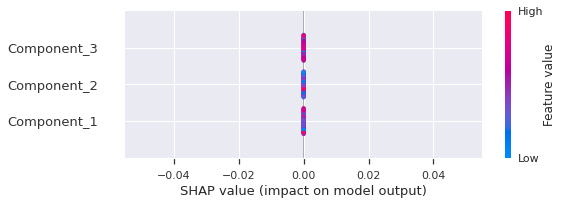

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')